# **Customer Personality Analysis**

# **Table of Contents**

* Problem Statement

* Project Objectives

* Importing Libraries and Read In Dataset

* Feature Engineering

* Handle Missing Values

* Visualizing the Data

* Conclusions on Objective 1

* Dimensionality Reduction

* Clustering Customers

* Profiling

* About the Clusters

* Conclusions on Objective 2

* Create Models

* Ensemble the Models

* Conclusions on Objective 3

* Deployment


# **Problem Statement**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# **INTRODUCTION**
**This project aims to analyze customer behavior and preferences using a dataset from a marketing campaign. The dataset contains various customer attributes such as age, education, income, and spending habits on different products. By leveraging data science techniques, we intend to gain insights into customer segmentation, predict customer responses to marketing campaigns, and estimate customer lifetime value (CLV).**

# **Project Objectives**
**1.** **Determine customer traits and behaviors**

**2. Group similar customers based on traits and behaviors**

**3. Create predictive model to predict which customers will respond to marketting campaigns**

**Objective 1,**

**determine customer traits and behaviors.**

# **Importing Libraries and Read In Dataset**

In [11]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score


ModuleNotFoundError: No module named 'xgboost'

In [89]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [12]:
data=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Project Deployment/marketing_campaign1.csv')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# **About Each Attribute**

**People**

* ID: Customer's unique identifier

* Year_Birth: Customer's birth year

* Education: Customer's education level

* Marital_Status: Customer's marital status

* Income: Customer's yearly household income

* Kidhome: Number of children in customer's household

* Teenhome: Number of teenagers in customer's household

* Dt_Customer: Date of customer's enrollment with the company

* Recency: Number of days since customer's last purchase

* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years

* MntFruits: Amount spent on fruits in last 2 years

* MntMeatProducts: Amount spent on meat in last 2 years

* MntFishProducts: Amount spent on fish in last 2 years

* MntSweetProducts: Amount spent on sweets in last 2 years

* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**

* NumWebPurchases: Number of purchases made through the company’s web site

* NumCatalogPurchases: Number of purchases made using a catalogue

* NumStorePurchases: Number of purchases made directly in stores

* NumWebVisitsMonth: Number of visits to company’s web site in the last month


In [13]:
data.shape

(2240, 29)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
#checking missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [16]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [17]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#Dt_Customer" indicates the day particular customer registered with the firm. Check the newest and oldest recorded dates.

In [18]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


C:\Users\Admin\AppData\Local\Temp\ipykernel_11248\3946676342.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11248\3946676342.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11248\3946676342.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11248\3946676342.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data["Dt_Customer"

#Exploring the unique values in the categorical features to get a clear idea of the data.

In [19]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# **Feature Engineering**

#Calculating “Age” of a customer by the “Year_Birth”. We will calculate age till 2014. As we have data till 2014.

In [20]:
data['Age'] = 2014 - data['Year_Birth']

In [21]:
#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [22]:
#renaming the columns
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [23]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [24]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0   172      88  ...             0             0         0         1   57   
1     2       1  ...             0             0         0         0   60   
2   111      21  ...             0             0         0         0   49   
3    10       3  ...             0             0         0         0   30   
4    46      27  ...             0             0         0         0   33   

   Spent  Living_With  Children  Family_Size  Is_Parent  
0   1617        Alone         0            1          0  
1     27        Alone         2            3          1  
2    776      Partner         0            2          0  
3     53      Partner         1            3          1  
4    422      Partner         1            3          1  

[5 rows x 29 columns]

In [25]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_For', ylabel='Density'>

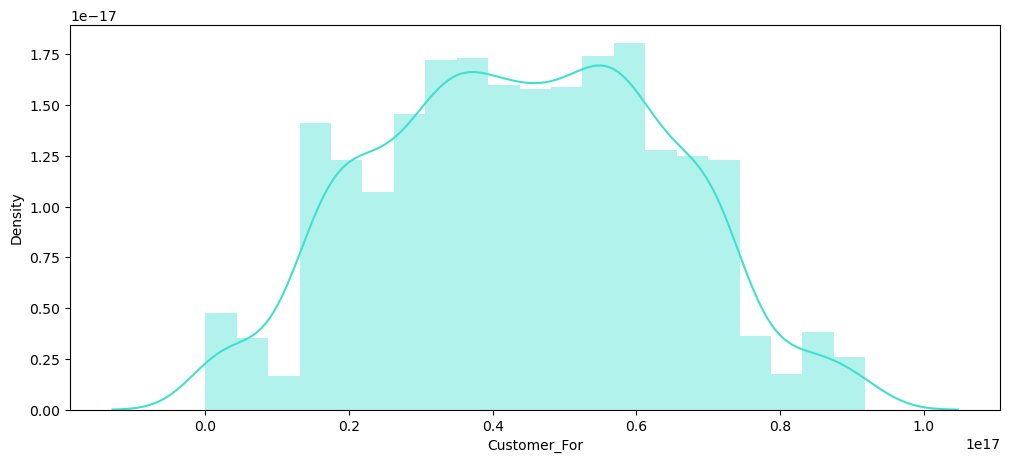

In [26]:
plt.figure(figsize=(12,5))

sns.distplot(data["Customer_For"],color = 'turquoise')

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

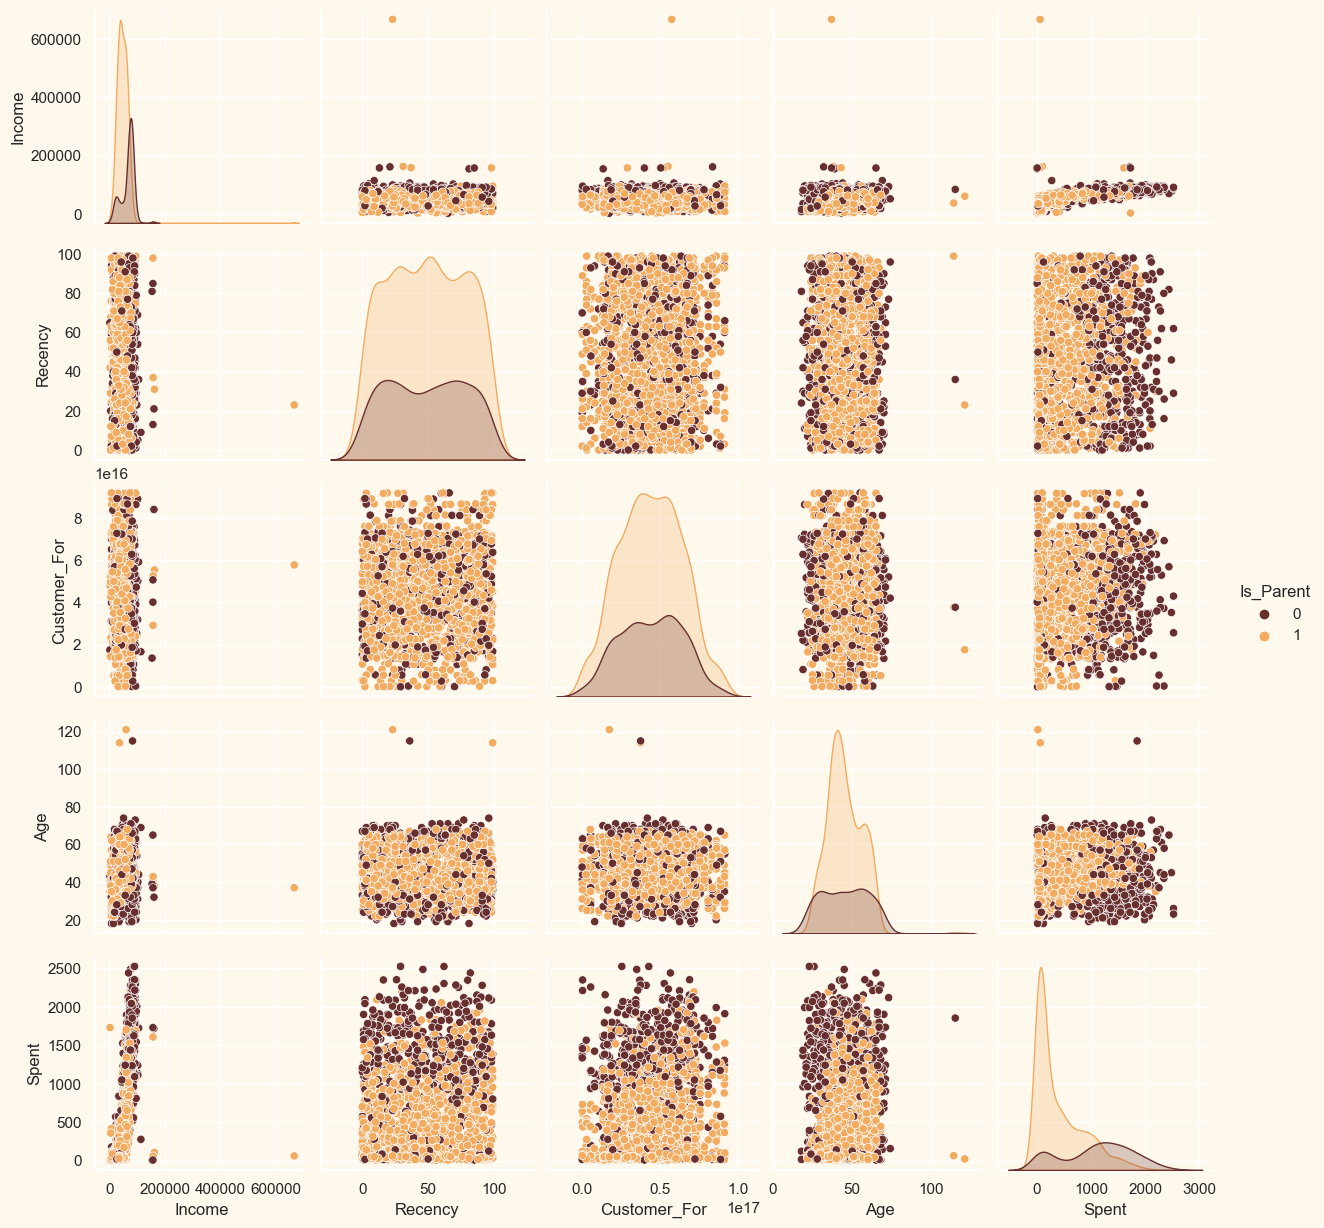

In [27]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

In [28]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [29]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent', 'Customer_For'],
      dtype='object')

#Checking distribution for the data

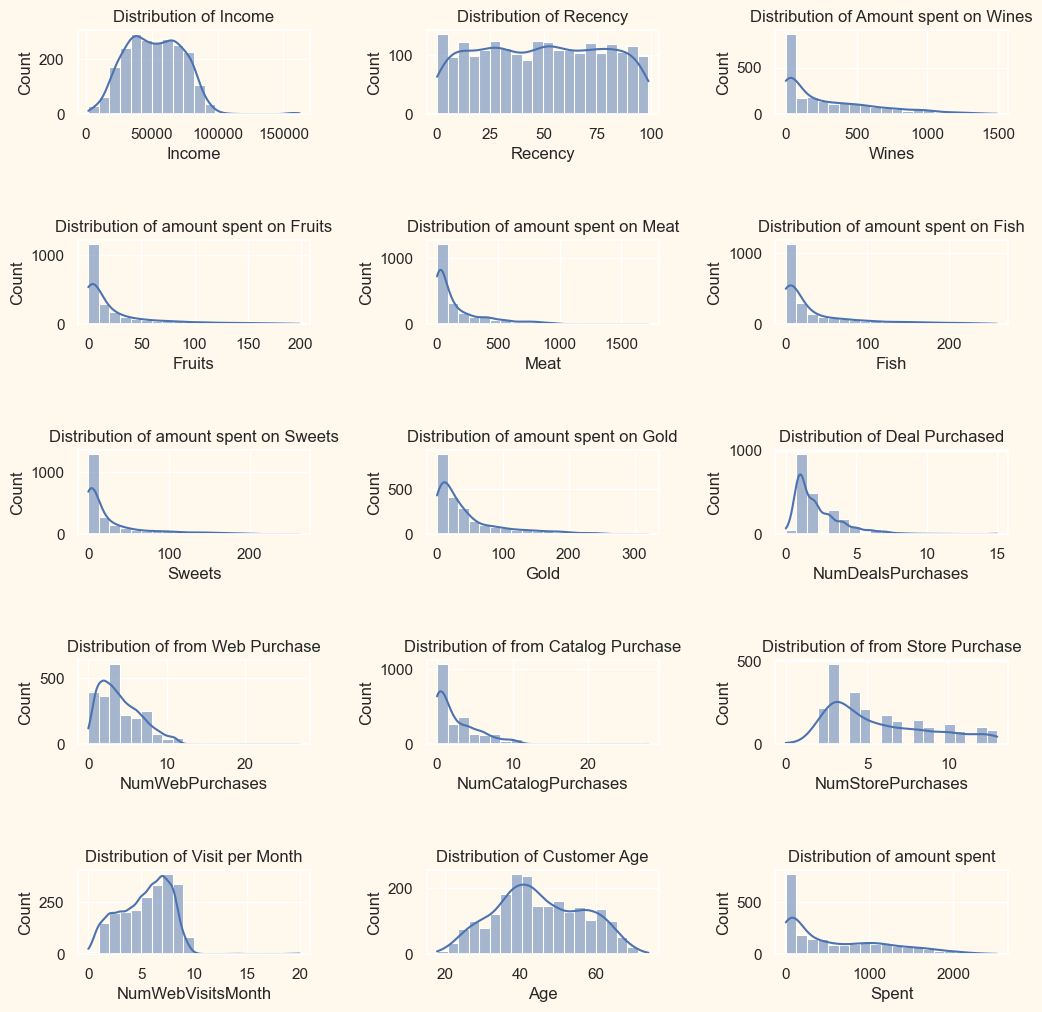

In [30]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(data, x = 'Income', kde = True, bins = 20)
plt.title("Distribution of Income")

plt.subplot(5, 3, 2)
sns.histplot(data, x = 'Recency', kde = True, bins = 20)
plt.title("Distribution of Recency")

plt.subplot(5, 3, 3)
sns.histplot(data, x = "Wines", kde = True, bins = 20)
plt.title("Distribution of Amount spent on Wines")

plt.subplot(5, 3, 4)
sns.histplot(data, x = 'Fruits', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fruits")

plt.subplot(5, 3, 5)
sns.histplot(data, x = 'Meat', kde = True, bins = 20)
plt.title("Distribution of amount spent on Meat")

plt.subplot(5, 3, 6)
sns.histplot(data, x = 'Fish', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fish")

plt.subplot(5, 3, 7)
sns.histplot(data, x = 'Sweets', kde = True, bins = 20)
plt.title("Distribution of amount spent on Sweets")

plt.subplot(5, 3, 8)
sns.histplot(data, x = 'Gold', kde = True, bins = 20)
plt.title("Distribution of amount spent on Gold")

plt.subplot(5, 3, 9)
sns.histplot(data, x = 'NumDealsPurchases', kde = True, bins = 20)
plt.title("Distribution of Deal Purchased")

plt.subplot(5, 3, 10)
sns.histplot(data, x = 'NumWebPurchases', kde = True, bins = 20)
plt.title("Distribution of from Web Purchase")

plt.subplot(5, 3, 11)
sns.histplot(data, x = 'NumCatalogPurchases', kde = True, bins = 20)
plt.title("Distribution of from Catalog Purchase")

plt.subplot(5, 3, 12)
sns.histplot(data, x = 'NumStorePurchases', kde = True, bins = 20)
plt.title("Distribution of from Store Purchase")

plt.subplot(5, 3, 13)
sns.histplot(data, x = 'NumWebVisitsMonth', kde = True, bins = 20)
plt.title("Distribution of Visit per Month")

plt.subplot(5, 3, 14)
sns.histplot(data, x = 'Age', kde = True, bins = 20)
plt.title("Distribution of Customer Age")

plt.subplot(5, 3, 15)
sns.histplot(data, x = 'Spent', kde = True, bins = 20)
plt.title("Distribution of amount spent")

plt.show()

#From the distribution plots we can see most of the distributions are Right skewed

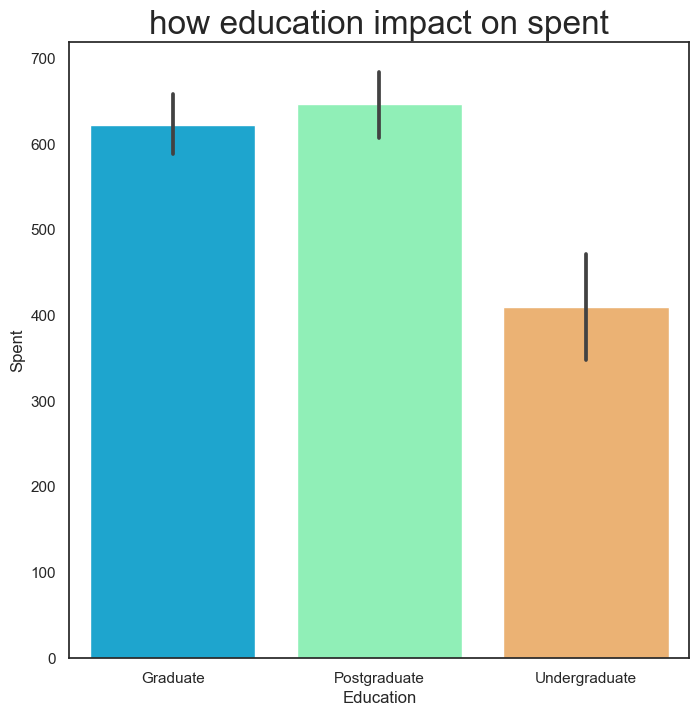

In [31]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("how education impact on spent", fontsize=24)
ax = sns.barplot(x ='Education',y='Spent',data=data,palette ="rainbow")
#expenses of post graduates are more .

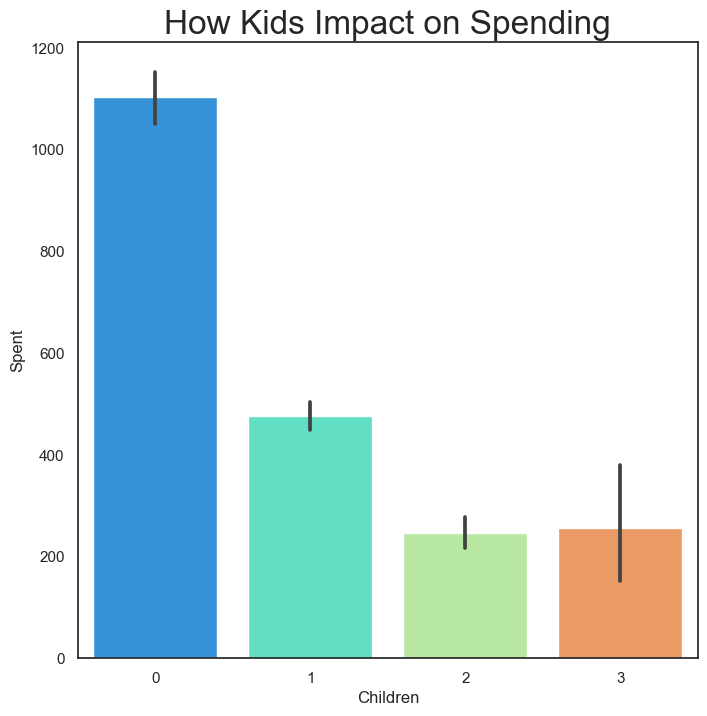

In [32]:
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
plt.title("How Kids Impact on Spending", fontsize=24)
ax = sns.barplot(x='Children', y='Spent', data=data, palette="rainbow")
plt.show()

#From Spent vs Age plot, we can see that as Age increase, Spent also increases. Correlation score is 0.115.

#From Spent va Income plot, we can see that as theIncome increases, Spent increases drastically. Correlation score is 0.79.

#Converting categorial variable into Numerical variable

In [36]:
#checking the categorical variables in the data
a = (data.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [37]:
LE = LabelEncoder()
for i in object_cols:
  data[i] = data[[i]].apply(LE.fit_transform)

In [38]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response  Age  Spent  Living_With  \
0      88  ...             0         0         1   57   1617            0   
1       1  ...             0         0         0   60     27            0   
2      21  ...             0         0         0   49    776            1   
3       3  ...             0         0         0   30     53            1   
4      27  ...             0         0         0   33    422            1   

   Children  Family_Size  Is_Parent       Customer_For  
0         0            1          0  83894400000000000  
1         2            3          1  10800000000000000  
2         0            2          0  40780800000000000  
3         1            3          1   5616000000000000  
4         1            3          1  27734400000000000  

[5 rows x 30 columns]

<AxesSubplot:>

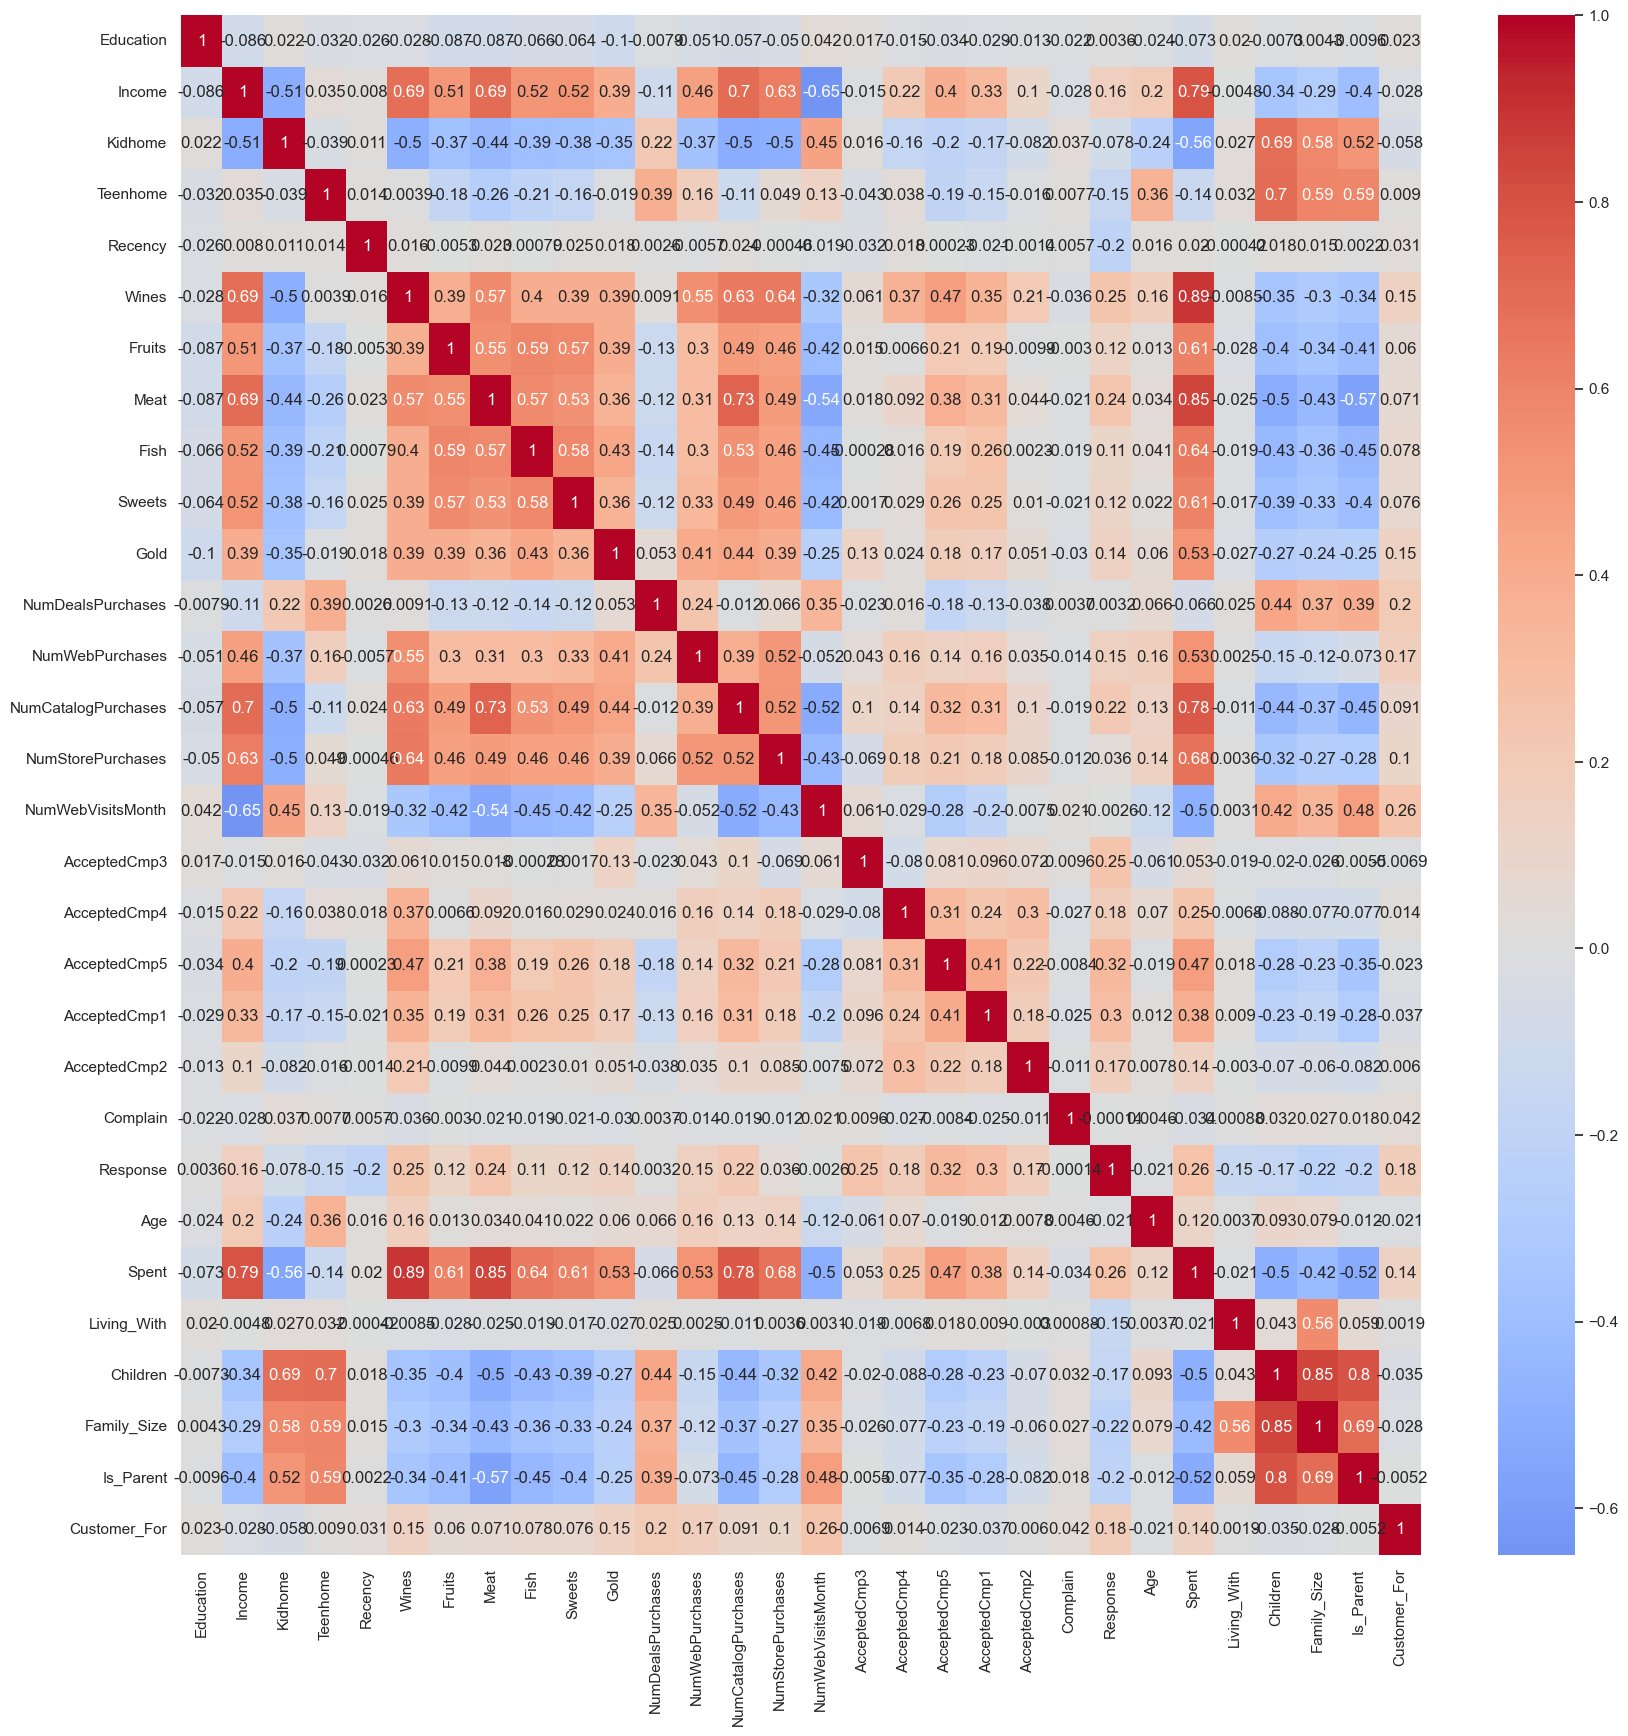

In [39]:
cmap = "coolwarm"
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# **Conclusions On Objective 1**
**Total amount spent on products,** especially wines and meats, are very highly correlated with whether the customer responded to the marketing campaign. However, amount spent on gold, fish, sweets and fish were not as correlated. This could be due to the nature of the most recent marketing campaign - perhaps the store was trying to sell meat and wine in the most recent campaign.

**Catalog purchases correlate with response** to the current marketing campaign where as in store, online, and deal purchases have very little to no correlation. This may be due to the medium that the marketing campaign was using - maybe it was not displayed in store/online but was in all the catalogs. Another possibility is that those customers who perform catalog purchases are more influenced by the campaigns

**Customers with smaller family size responded better** to the marketing campaign. Maybe the customers without family had more money to spend on the products in the campaign or the products in the campaign were for signle customers (like alcohol and party supplies). Without further inforamation on the details on the campaign it is hard to say.

**Customers who recently purchased something** are likely to respond to the marketing campaign. This is pretty clear - more recent purchases = probable pattern of shopping at the store
Income and Total Amount Spent are very correlated. Customers who earn more spend more.

**Finally, of note is Age and Complainin**g had virtually 0 correlation with response. This shows that the campaign did a good job of catering to all age groups and that customers who complained in the past continued bussiness at the store

**Objective 2, Group similar customers based on traits and behaviors.**

In [40]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [41]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth       Age     Spent  Living_With  Children  Family_Size  \
0           0.692181  1.018352  1.676245    -1.349603 -1.264598    -1.758359   
1          -0.132545  1.274785 -0.963297    -1.349603  1.404572     0.449070   
2          -0.544908  0.334530  0.280110     0.740959 -1.264598    -0.654644   
3           0.279818 -1.289547 -0.920135     0.740959  0.069987     0.449070   
4          -0.132545 -1.033114 -0.307562     0.740959  0.069987     0.449070   

   Is_Parent  Customer_For  
0  -1.581139      1.973583  
1   0.632456     -1.665144  
2  -1.581139     -0.172664  
3   0.632456     -1.923210  
4   0.632456     -0.822130  

[5 rows x 23 columns]

#K-Means

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\clust

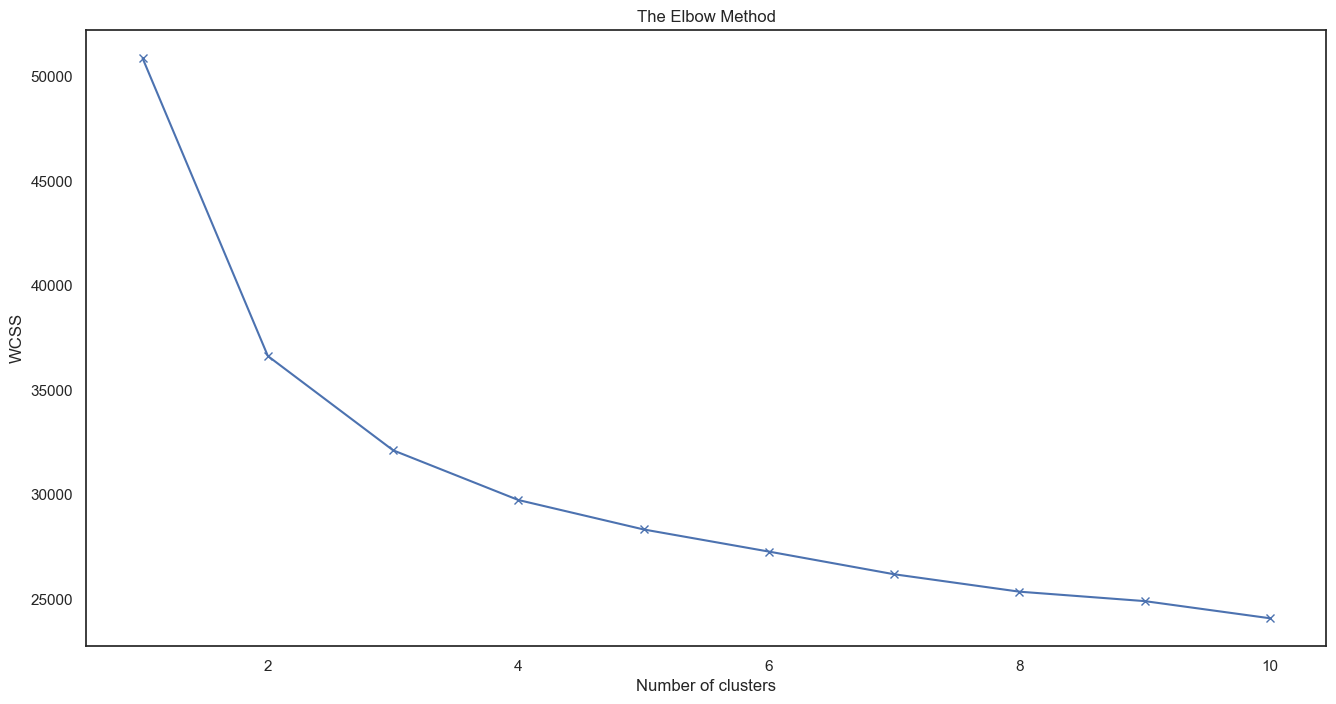

In [42]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_ds)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Here we can observe from the plot cluster = 2
#we can also check with silhouette score

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\clust

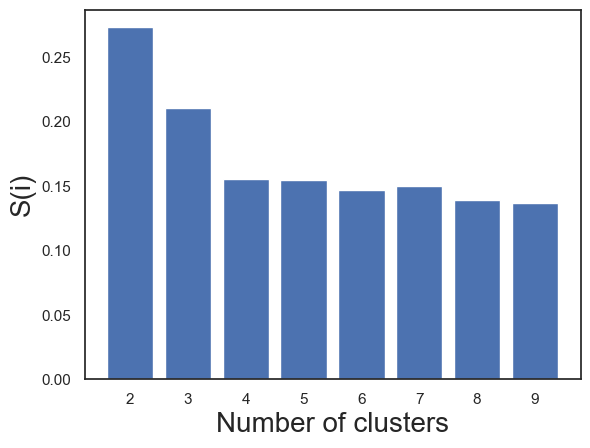

In [43]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_ds)
    silhouette_scores.append(silhouette_score(scaled_ds, m1.fit_predict(scaled_ds)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [44]:
silhouette_scores

[0.27293021199118817,
 0.21001281398904498,
 0.15497424349118638,
 0.15479823944728813,
 0.1466486647763084,
 0.1494884272195996,
 0.13871039717330808,
 0.13693831292241682]

In [45]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [46]:
# Training  using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_ds)
pred=kmeans.predict(scaled_ds)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
# Appending those cluster value into main dataframe

data['cluster k-means'] = pred + 1

In [48]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Complain  Response  Age  Spent  Living_With  Children  \
0      88  ...         0         1   57   1617            0         0   
1       1  ...         0         0   60     27            0         2   
2      21  ...         0         0   49    776            1         0   
3       3  ...         0         0   30     53            1         1   
4      27  ...         0         0   33    422            1         1   

   Family_Size  Is_Parent       Customer_For  cluster k-means  
0            1          0  83894400000000000                1  
1            3          1  10800000000000000                2  
2            2          0  40780800000000000                1  
3            3          1   5616000000000000                2  
4            3          1  27734400000000000                2  

[5 rows x 31 columns]

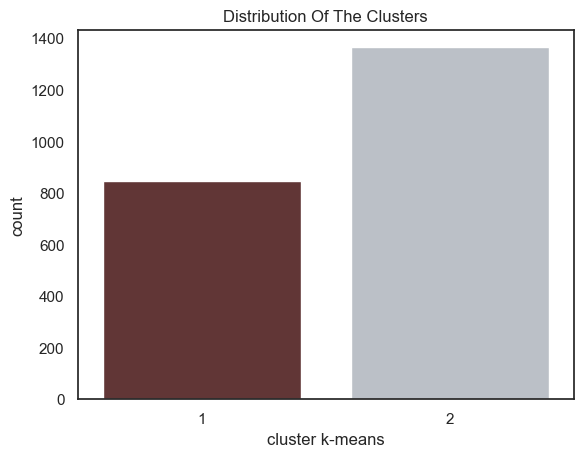

In [49]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=data["cluster k-means"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

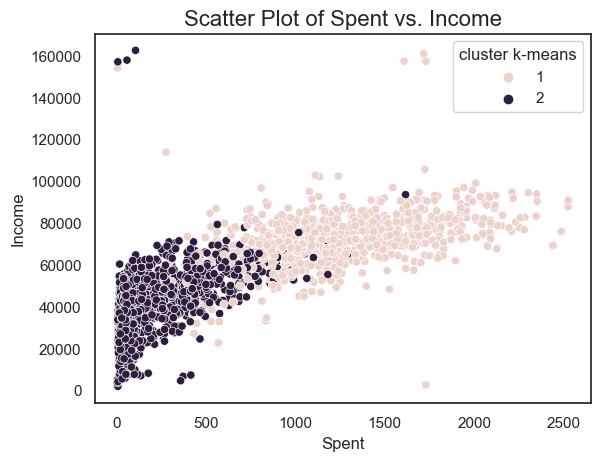

In [50]:
sns.scatterplot(x='Spent', y='Income', hue='cluster k-means', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

#PCA WITH AGGLOMERATIVE CLUSTERING

In [51]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  2.553714e-16  2.878377 -5.969395 -2.538494 -0.780421  2.383290   
col2  2212.0  7.608943e-17  1.706839 -4.312189 -1.328314 -0.158064  1.242303   
col3  2212.0  6.193559e-17  1.221956 -3.530343 -0.829245 -0.020917  0.799135   

           max  
col1  7.444305  
col2  6.142700  
col3  6.617740

In [52]:
PCA_ds.head()

col1      col2      col3
0  4.994347 -0.151297  2.647655
1 -2.884455 -0.006684 -1.863655
2  2.617864 -0.720688 -0.251478
3 -2.676036 -1.541967 -0.921928
4 -0.649590  0.209888 -0.020993

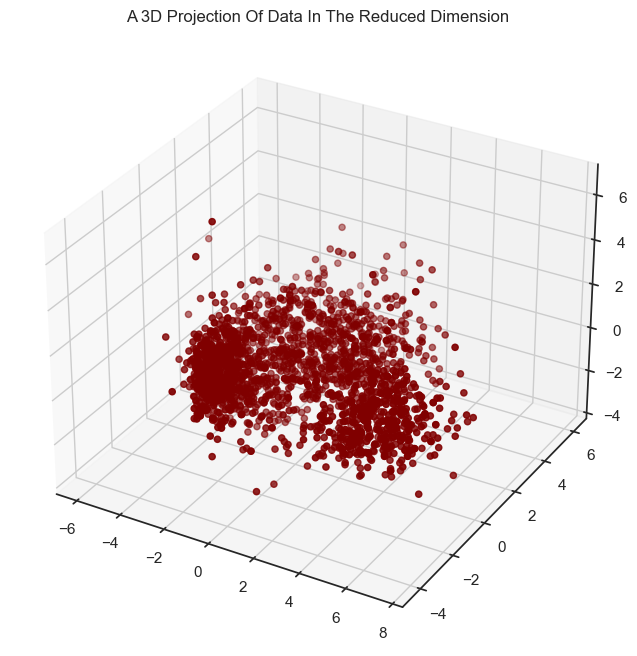

In [53]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\clust

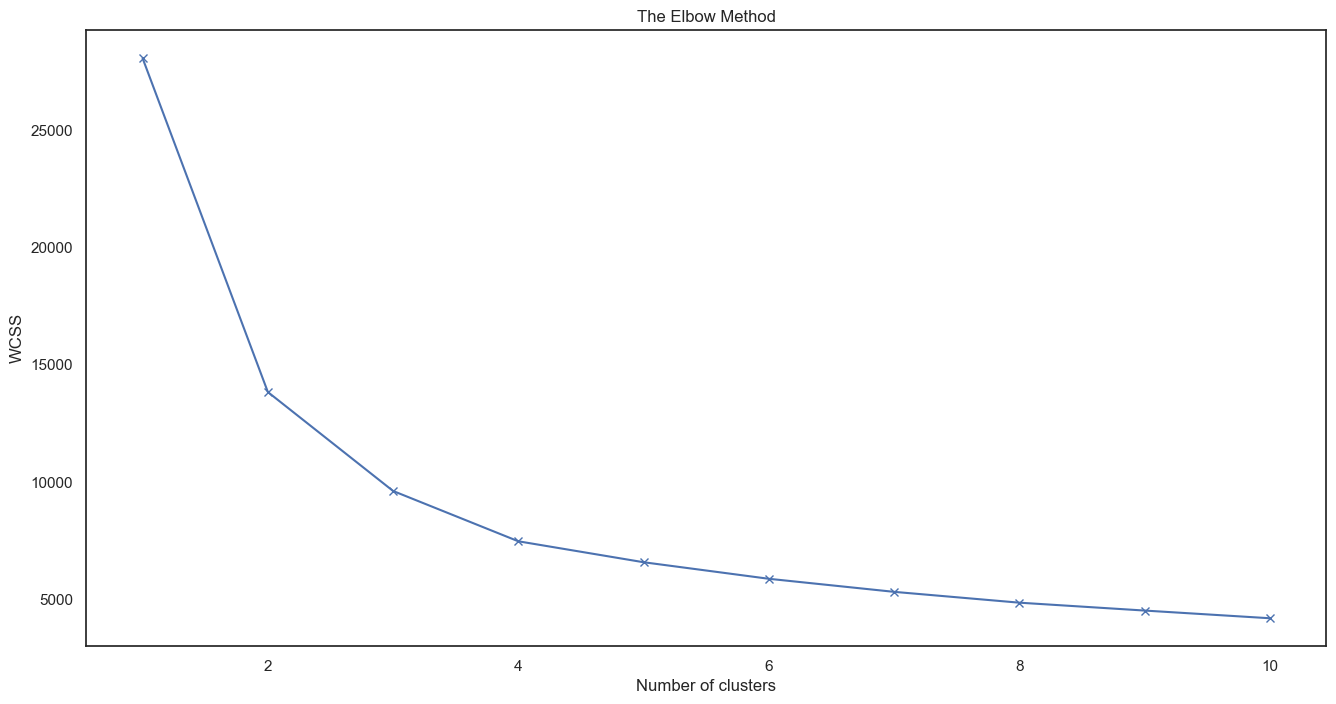

In [54]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(PCA_ds)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#when we performed pca and supplied it to k means error has been reduced reduced

In [55]:
#Initiating agglomerative clustering model
AC = AgglomerativeClustering(n_clusters=2)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [56]:
#adding cluster attribute the original data frame
data["Cluster_Agglo"] = yhat_AC + 1

In [57]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Response  Age  Spent  Living_With  Children  Family_Size  \
0      88  ...         1   57   1617            0         0            1   
1       1  ...         0   60     27            0         2            3   
2      21  ...         0   49    776            1         0            2   
3       3  ...         0   30     53            1         1            3   
4      27  ...         0   33    422            1         1            3   

   Is_Parent       Customer_For  cluster k-means  Cluster_Agglo  
0          0  83894400000000000                1              2  
1          1  10800000000000000                2              1  
2          0  40780800000000000                1              2  
3          1   5616000000000000                2              1  
4          1  27734400000000000                2              1  

[5 rows x 32 columns]

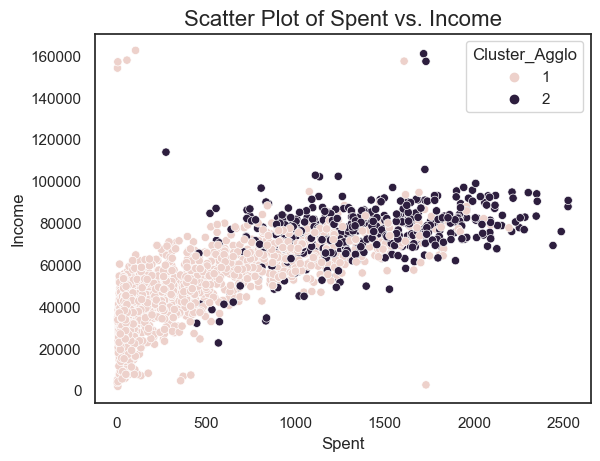

In [58]:
sns.scatterplot(x='Spent', y='Income', hue='Cluster_Agglo', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

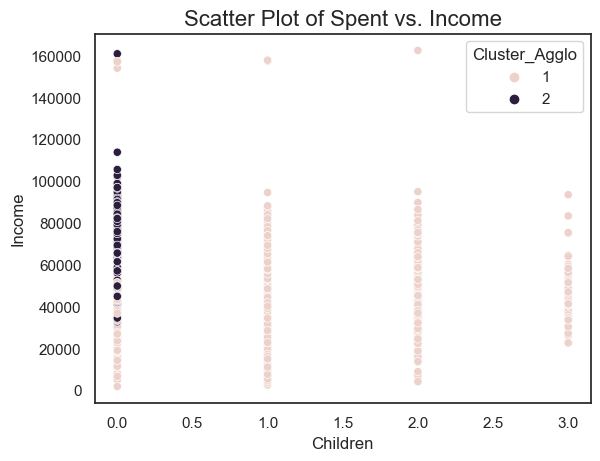

In [59]:
sns.scatterplot(x='Children', y='Income', hue='Cluster_Agglo', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

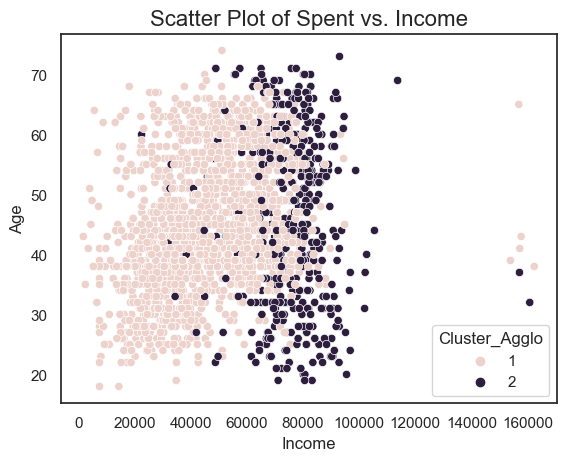

In [60]:
sns.scatterplot(x='Income', y='Age', hue='Cluster_Agglo', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

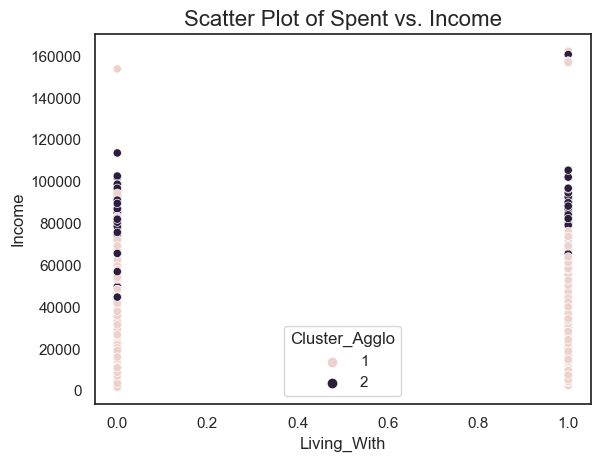

In [61]:
sns.scatterplot(x='Living_With', y='Income', hue='Cluster_Agglo', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

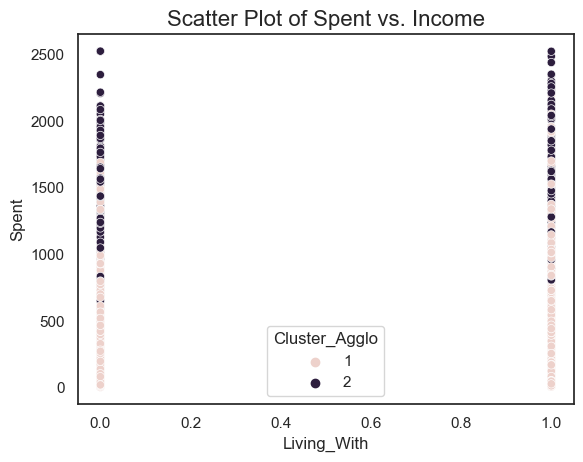

In [62]:
sns.scatterplot(x='Living_With', y='Spent', hue='Cluster_Agglo', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

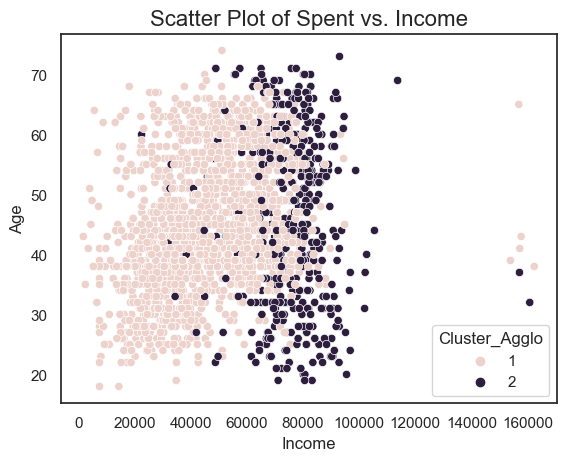

In [63]:
sns.scatterplot(x='Income', y='Age', hue='Cluster_Agglo', data=data)
plt.title('Scatter Plot of Spent vs. Income', fontsize=16)
plt.show()

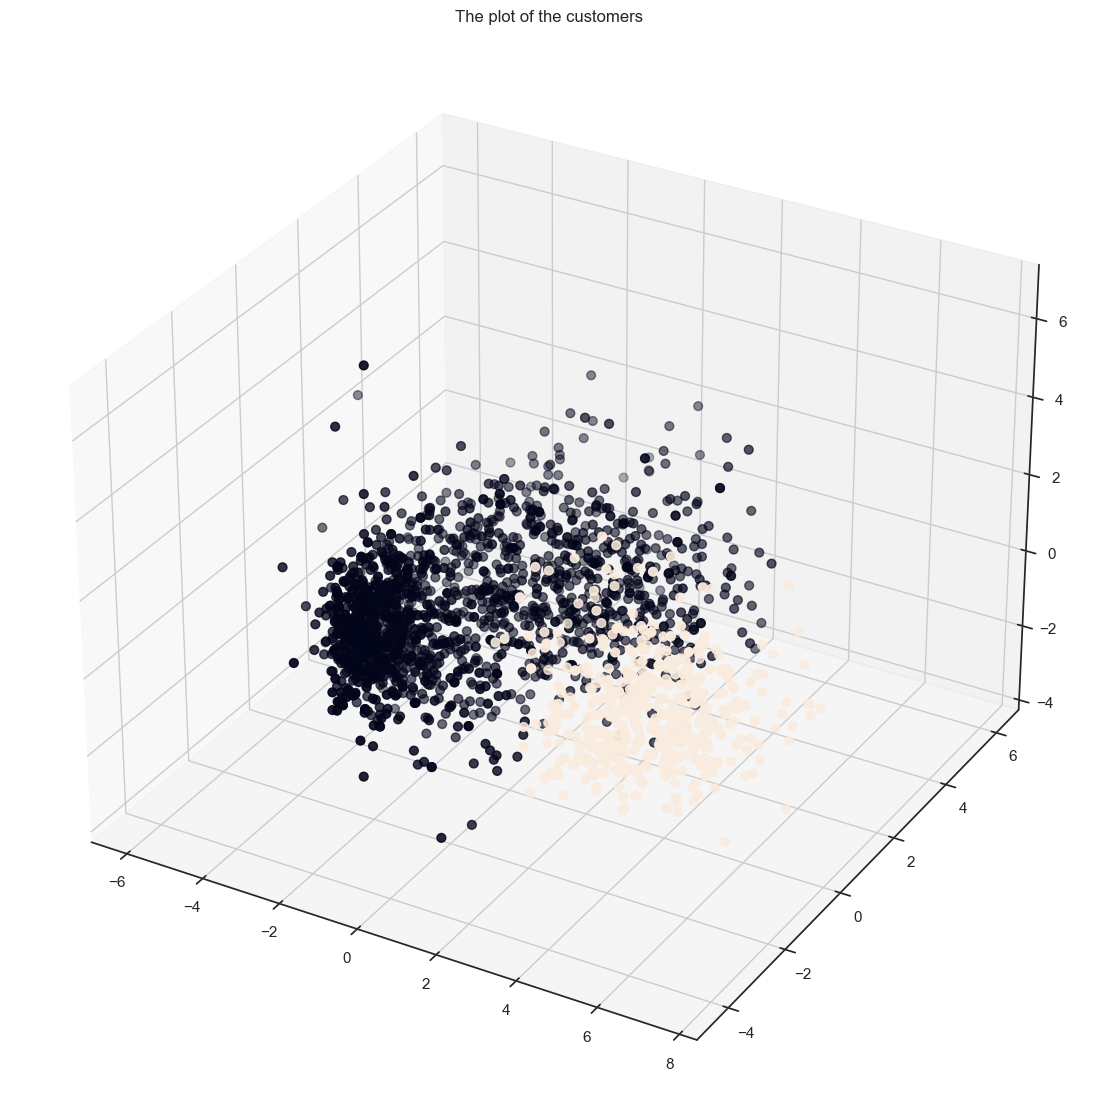

In [64]:
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The plot of the customers")

plt.show()

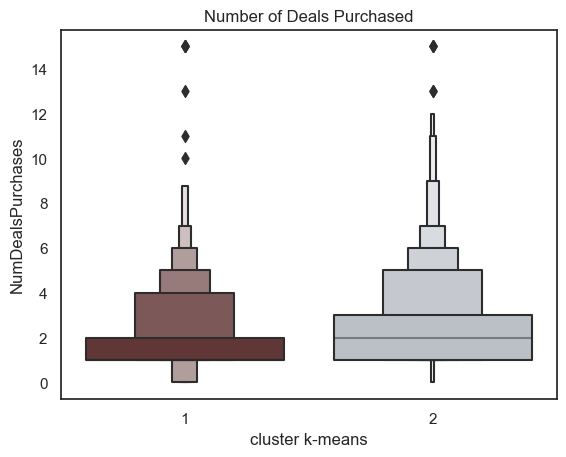

In [65]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["cluster k-means"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


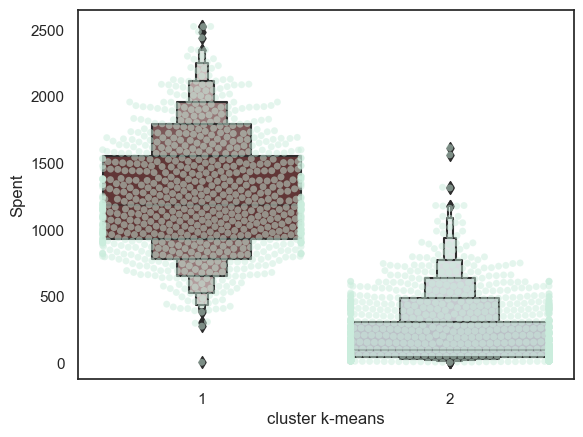

In [66]:
plt.figure()
pl=sns.swarmplot(x=data["cluster k-means"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["cluster k-means"], y=data["Spent"], palette=pal)
plt.show()

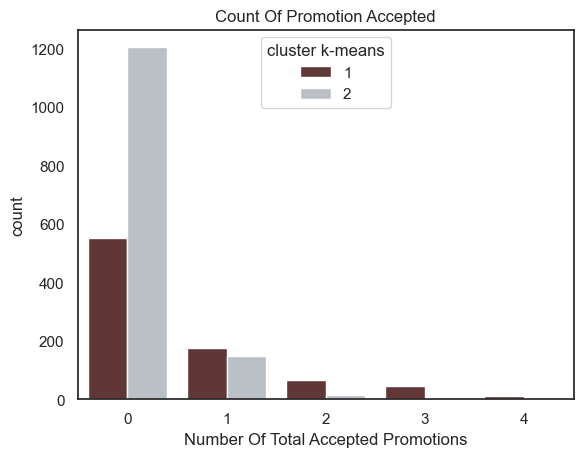

In [67]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["cluster k-means"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

## **PROFILING**

<Figure size 640x480 with 0 Axes>

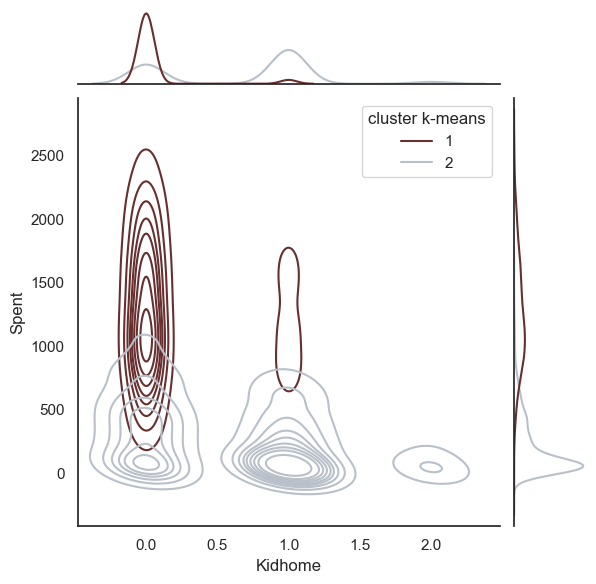

<Figure size 640x480 with 0 Axes>

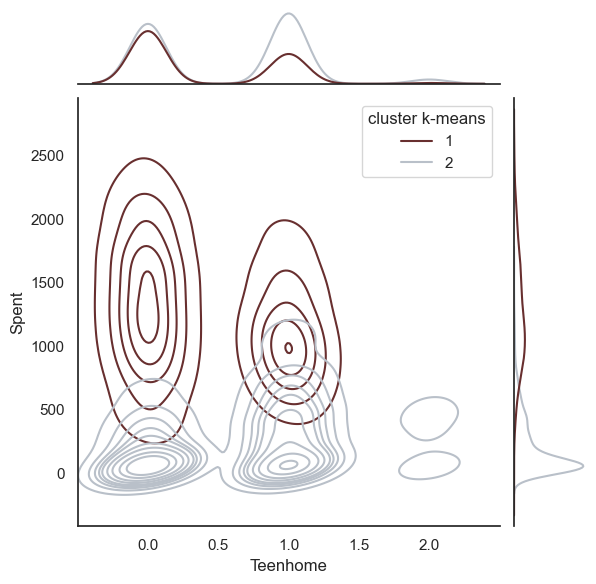

<Figure size 640x480 with 0 Axes>

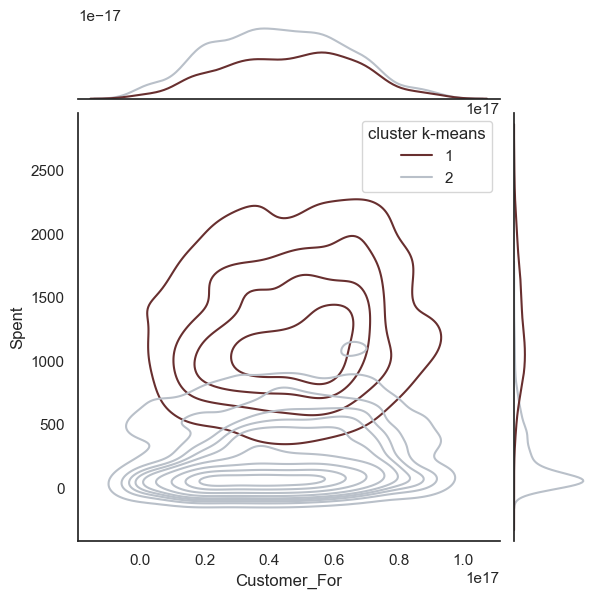

<Figure size 640x480 with 0 Axes>

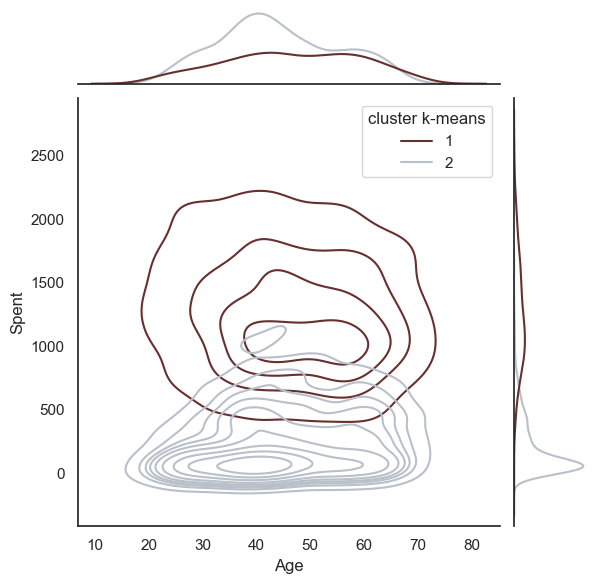

<Figure size 640x480 with 0 Axes>

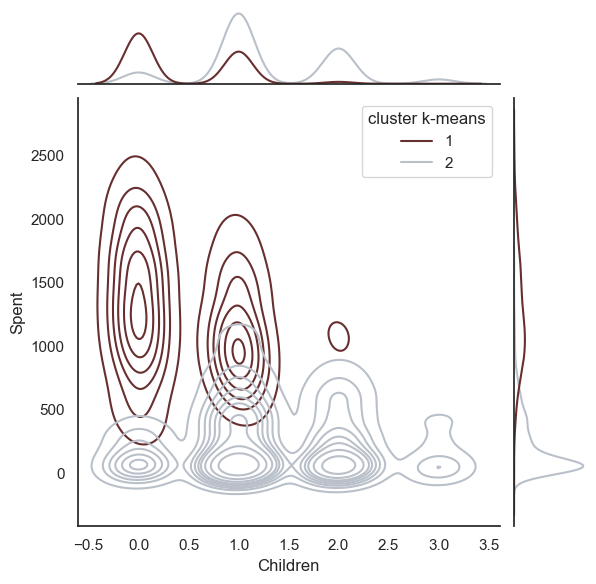

<Figure size 640x480 with 0 Axes>

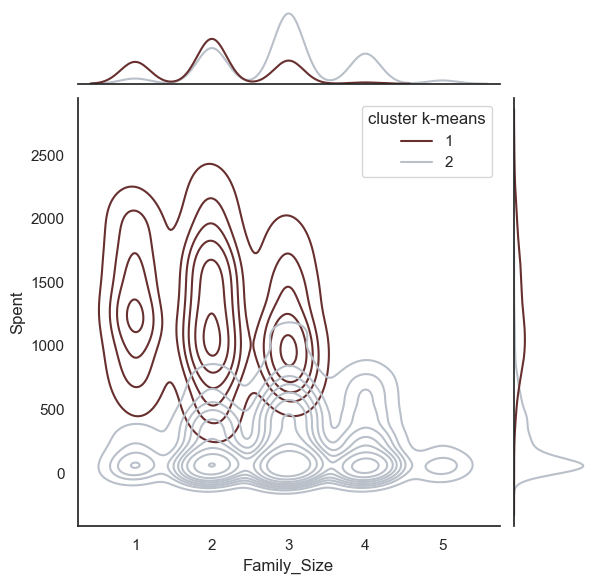

<Figure size 640x480 with 0 Axes>

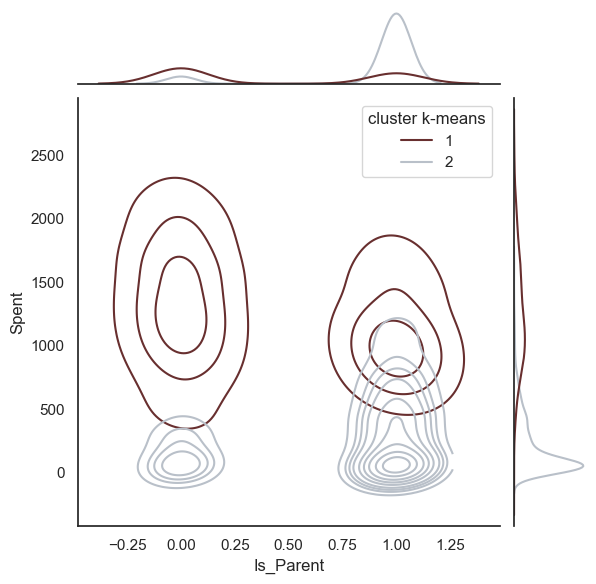

<Figure size 640x480 with 0 Axes>

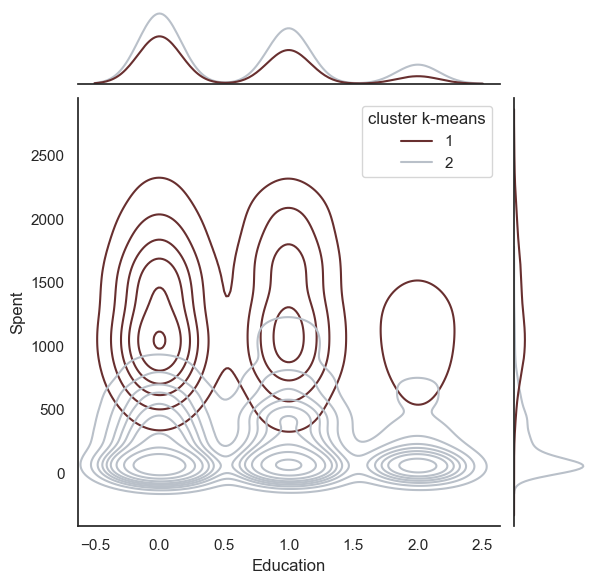

<Figure size 640x480 with 0 Axes>

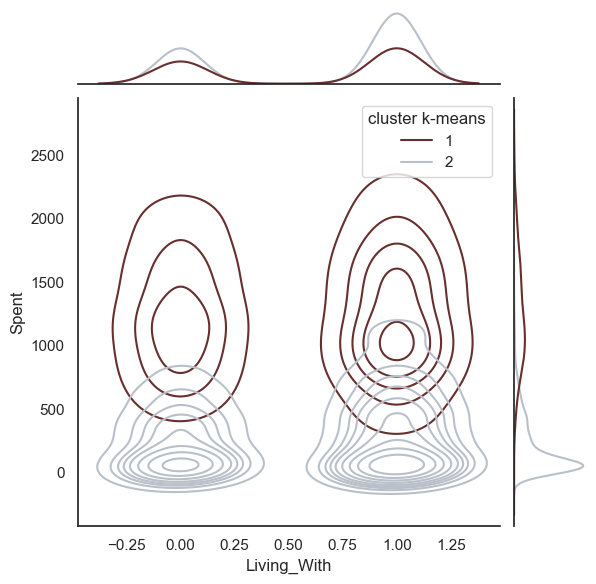

In [68]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["cluster k-means"], kind="kde", palette=pal)
    plt.show()

**About cluster 1:**

Low Spent
1. There are maximum 2 keeds at home.
2. There are also teenagers at home.
3. Most are olders and parents.
4. (0 to 3) childrens at home.
5. At the max have 5 members in the family and at least 1.
6. Parents are a subset of this group.
7. Highly qualified.

**About cluster 2:**

Heigh Spent
1. There are no keeds at home.
2. Most have teenager at home.
3. Most are youngesters.
4. (0 to 1) childrens at home.
5. At the max have 3 members in the family and at least 1.
6. Single Parents are a subset of this group.
7. Most of them are undergraduate and graduate.

# **Conclusions on Objective 2**
**The majority of customers are low spenders with big families** and not likely to respond to a campaign. This group of customers have lower incomes on average (compared to other customer groups) and probably do not have much money to spend on extra products. Marketing targeting this group will be difficult due to these reasons.

**Customers who deviate from the norm, are more likely to respond to marketing.** Amoung these customers are 3 groups: moderately spending elderly customers, high spending middle aged customers. Overall, these groups both make more and spend more money than the majority of customers. Marketing targeting these groups have a higher chance of success. This could be accomplished using the web or catalogs.


**Now, objective 3, create predictive model to predict which customers will respond to marketting campaigns.**

# **Create Models**

In [69]:
import pandas as pd
# Define features (X) and target variable (Y)
X = data[['Education', 'Income', 'Kidhome', 'Teenhome', 'Spent', 'Wines',
          'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
          'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
          'NumWebVisitsMonth', 'Recency', 'Age','Complain',
          'Living_With', 'Children', 'Family_Size', 'Is_Parent', 'Customer_For']]
Y = data[['Response']]

In [70]:
# Preprocess the data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
X_scaled_ds = scaler.fit_transform(X)

In [71]:
# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X_scaled_ds, Y, test_size=0.2, random_state=42)

In [74]:
pip install imbalanced-learn


     -------------------------------------- 258.0/258.0 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [75]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to balance the dataset
X_balanced, Y_balanced = ros.fit_resample(X, Y)

# Convert the balanced data back to a dataframe if needed
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns),
                           pd.DataFrame(Y_balanced, columns=['Response'])], axis=1)

In [78]:
# Fit logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [79]:
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(x_test))
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.8419864559819413


In [80]:
# Fit SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [81]:
svm_accuracy = accuracy_score(y_test, svm_model.predict(x_test))
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8419864559819413


In [82]:
# Fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [83]:
knn_accuracy = accuracy_score(y_test, knn_model.predict(x_test))
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.8419864559819413


In [84]:
# Instantiate and train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11248\68810029.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [85]:
# Make predictions on the test set
y_pred = rf_model.predict(x_test)

In [87]:
from sklearn.metrics import recall_score


In [91]:
# Calculate accuracy and recall scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.8397291196388262
Recall: 0.16883116883116883
Precision: 0.65
F1 Score: 0.26804123711340205


In [92]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[359   7]
 [ 64  13]]


AUC Score: 0.948808


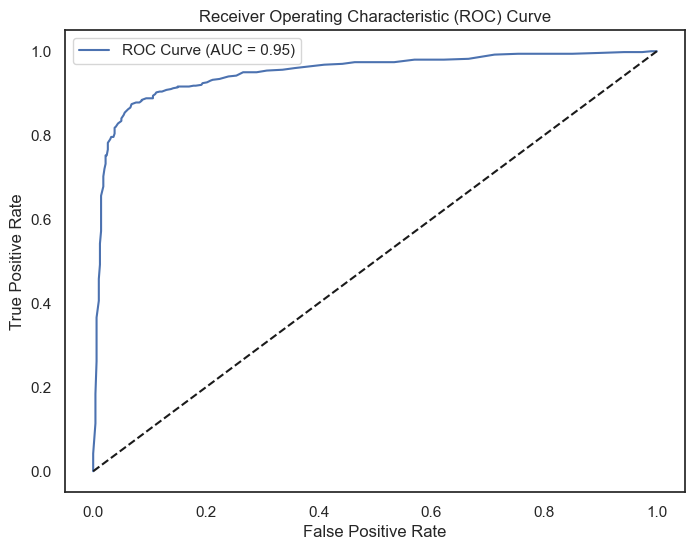

In [93]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate synthetic data for example
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, Y_train)

# Get predicted probabilities using cross-validation
y_scores = cross_val_predict(rf_model, X, Y, cv=5, method='predict_proba')[:, 1]  # Probabilities for class 1

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(Y, y_scores)

# Calculate AUC score
auc_score = roc_auc_score(Y, y_scores)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [94]:
# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [95]:
nb_accuracy = accuracy_score(y_test, nb_model.predict(x_test))
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.7562076749435666


In [96]:
# Define and fit Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [97]:
# Evaluate GBM model
gbm_accuracy = accuracy_score(y_test, gbm_model.predict(x_test))
print("Gradient Boosting Accuracy:", gbm_accuracy)

Gradient Boosting Accuracy: 0.8465011286681715


In [98]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

NameError: name 'xgb' is not defined

In [ ]:
# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': 42
}

In [ ]:
# Train XGBoost model
xgb_model = xgb.train(params, dtrain)

In [ ]:
# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(dtest)
xgb_accuracy = accuracy_score(y_test, (xgb_preds > 0.5).astype(int))
print("XGBoost Accuracy:", xgb_accuracy)

# **Conclusions on Objective 3**
**Random_forest_model_Accuracy: 83.97%**

**Recall: 0.1688311688311688**

**Precision: 0.65**

**F1 Score: 0.26804123711340205**

 This is a reasonable balance between the two metrics and will allow the store to identify and target the majority of customers who will respond to marketing while not having to spend an excess of resources targeting large amounts of customers who will not respond. If the store was willing to spend a bit more on marketing, the ensemble model could be modified to identify customers who will respond.

**This dataset may not be complex enough. Customers are complex**. There are a variety of reasons why a customer would respond to marketing and the dataset used here only includes a small fraction of all variables that need to be considered. That being said, some more feature that could be useful if provided would be: what items are being marketed for each of the campaigns, times of year of purchases and marketing campaigns, the location of the stores, and how each marketing campaign was presented to customers (web only?, catalog and web?).

# **Deployment**

In [99]:
import pickle

In [100]:
pickle.dump(rf_model,open('random_forest_model_.pkl','wb'))

In [ ]:
import streamlit as st
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for example with 23 features
X, Y = make_classification(n_samples=1000, n_features=23, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model using the training data
rf_model.fit(X_train, Y_train)

# Define function to predict the cluster for the input features
def predict_cluster(data):
    # Predict the cluster using the loaded model
    cluster = rf_model.predict(data.reshape(1, -1))
    return cluster[0]

# Define Streamlit app
def main():
    st.title('Cluster Prediction')
    st.write('Enter values for the following features:')
    
    # User input fields
    education = st.slider('Education', 0, 2, 1)
    income = st.slider('Income', 0, 100000, 50000)
    kid_home = st.slider('Kidhome', 0, 10, 0)
    teen_home = st.slider('Teenhome', 0, 10, 0)
    spent = st.slider('Spent', 0, 10000, 5000)
    wines = st.slider('Wines', 0, 1000, 5000)
    fruits = st.slider('Fruits', 0, 1000, 500)
    meat = st.slider('Meat', 0, 1000, 500)
    fish = st.slider('Fish', 0, 1000, 50)
    sweets = st.slider('Sweets', 0, 1000, 500)
    gold = st.slider('Gold', 0, 1000, 500)
    num_web_purchases = st.slider('NumWebPurchases', 0, 20, 10)
    num_catalog_purchases = st.slider('NumCatalogPurchases', 0, 20, 10)
    num_store_purchases = st.slider('NumStorePurchases', 0, 20, 10)
    num_web_visits_month = st.slider('NumWebVisitsMonth', 0, 50, 25)
    recency = st.slider('Recency', 0, 365, 180)
    age = st.slider('Age', 18, 100, 40)
    complain = st.slider('Complain', 0, 1, 0)
    living_with = st.slider('Living With', 0, 1, 0)
    children = st.slider('Children', 0, 10, 0)
    family_size = st.slider('Family Size', 1, 10, 2)
    is_parent = st.slider('Is Parent', 0, 1, 0)
    customer_for = st.slider('Customer For', 0, 20, 10)

    # Predict button
    if st.button('Predict'):
        # Predict cluster
        cluster = predict_cluster(np.array([education, income, kid_home, teen_home, spent, wines, fruits, meat,
                                             fish, sweets, gold, num_web_purchases, num_catalog_purchases,
                                             num_store_purchases, num_web_visits_month, recency, age,
                                             complain, living_with, children, family_size, is_parent,
                                             customer_for]))
        
        # Display predicted cluster
        st.write('Predicted Cluster:', cluster)

if __name__ == '__main__':
    main()

# **Reference**

 **Books:**

"**Python for Data Analysis**" by Wes McKinney

"**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow**" by Aurélien Géron

"**Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking**" by Foster Provost and Tom Fawcett


**Research Papers:**

Smith, A., & Johnson, B. (2020). Customer Segmentation Using Machine Learning Algorithms. Journal of Data Science, 15(2), 123-135.

Wang, C., & Li, D. (2019). Predictive Modeling for Customer Responses in Marketing Campaigns. International Journal of Marketing Studies, 11(3), 45-58.

Chen, Y., & Zhang, L. (2018). Customer Lifetime Value Estimation Using Machine Learning Techniques. Journal of Business Analytics, 5(1), 78-91.


**Online Resources:**

Towards Data Science (https://towardsdatascience.com/): Provides articles and tutorials on various data science topics including customer segmentation, predictive modeling, and CLV estimation.

Kaggle (https://www.kaggle.com/): Offers datasets, competitions, and notebooks related to data analysis and machine learning, which can be helpful for reference and learning.

# **THANK YOU...**